In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns


In [2]:
# import geopandas and get the geoBoundaries-BGD-ADM2.shp file to visualize the map of bangladesh

geo_df = gpd.read_file('map/geoBoundaries-BGD-ADM2.shp')
geo_df.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Bagerhat,NaN,16705992B20839200632344,BGD,ADM2,"MULTIPOLYGON (((89.84021 21.82784, 89.84052 21..."
1,Bandarban,NaN,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186..."
2,Barguna,NaN,16705992B22239328109606,BGD,ADM2,"MULTIPOLYGON (((89.87968 22.07869, 89.87865 22..."
3,Barisal,NaN,16705992B48524436232680,BGD,ADM2,"MULTIPOLYGON (((90.55435 22.59264, 90.55435 22..."
4,Bhola,NaN,16705992B20840636248400,BGD,ADM2,"MULTIPOLYGON (((90.77172 21.85595, 90.76920 21..."


In [3]:
# plot the district names inside the map 
geo_df['coords'] = geo_df['geometry'].apply(lambda x: x.representative_point().coords[:])
geo_df['coords'] = [coords[0] for coords in geo_df['coords']]
geo_df.head()


,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,coords
0,Bagerhat,NaN,16705992B20839200632344,BGD,ADM2,"MULTIPOLYGON (((89.84021 21.82784, 89.84052 21...","(89.75429176407334, 22.523421011000067)"
1,Bandarban,NaN,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186...","(92.38619729828679, 21.77005344750006)"
2,Barguna,NaN,16705992B22239328109606,BGD,ADM2,"MULTIPOLYGON (((89.87968 22.07869, 89.87865 22...","(90.20372690701797, 22.172934357500026)"
3,Barisal,NaN,16705992B48524436232680,BGD,ADM2,"MULTIPOLYGON (((90.55435 22.59264, 90.55435 22...","(90.3251569997336, 22.761486941000044)"
4,Bhola,NaN,16705992B20840636248400,BGD,ADM2,"MULTIPOLYGON (((90.77172 21.85595, 90.76920 21...","(90.76798344375277, 22.400836482000045)"


C:\Users\errhy\AppData\Local\Temp\ipykernel_2512\417291335.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):


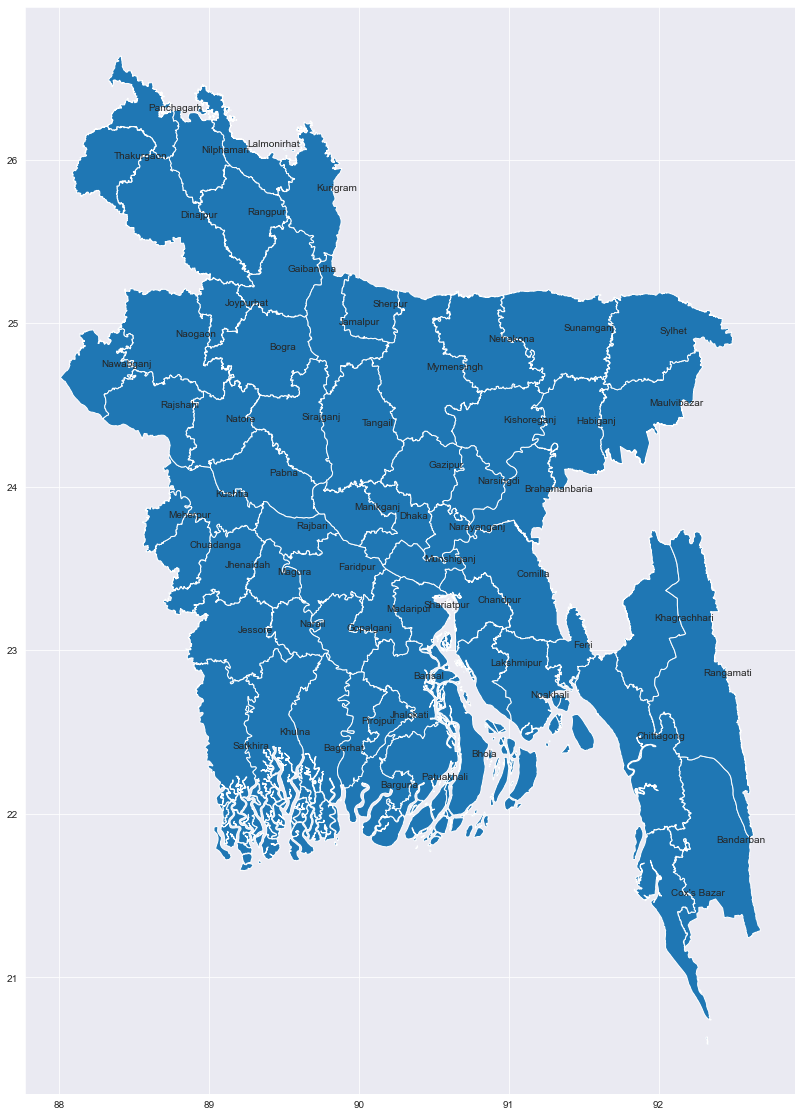

In [4]:
# plot the district names inside the map
fig,ax = plt.subplots(figsize=(20,20))
ax = geo_df.plot(ax=ax)
for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",fontsize=10)
plt.show()

In [5]:
# import the riceprice data csv
df = pd.read_csv('riceprice.csv')
df.head()

,department,district,Upazila,Bazar,Merchandise,Price type,year,lowest price,Maximum price,average price
0,Khulna,Satkhira,Satkhira Sadar,Satkhira Sadar,Aman,Retail,2010,4.0,5.0,4.50
1,Dhaka,Rajbari,Rajbari Sadar,Rajbari Sadar,Aman,Retail,2010,5.0,5.0,5.00
2,Dhaka,Kishoreganj,Kishoreganj Sadar,Kishoreganj Sadar,Aman,Retail,2010,5.0,6.0,5.50
3,Dhaka,Netrokona,Netrokona Sadar,Netrokona Sadar,Aman,Retail,2010,10.0,12.0,11.00
4,Dhaka,Netrokona,Netrokona Sadar,Netrokona Sadar,Aman,Retail,2010,12.0,12.5,12.25


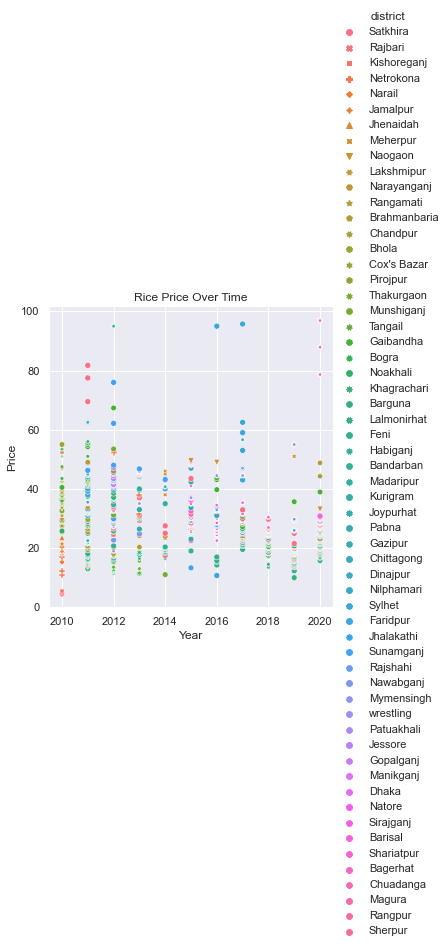

In [6]:
# make a heat map showing the rice price for each district over time, with the color intensity indicating the price level and the x-axis indicating the time

sns.set(style="darkgrid")

sns.relplot(x="year", y="average price", hue="district", style="district", data=df)
plt.title('Rice Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()


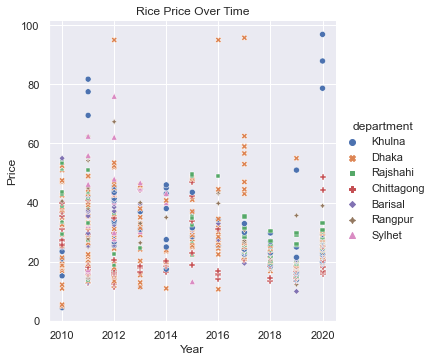

In [7]:
# make a heat map showing the rice price for each district over time, with the color intensity indicating the price level and the x-axis indicating the time

sns.set(style="darkgrid")

sns.relplot(x="year", y="average price", hue="department", style="department", data=df)
plt.title('Rice Price Over Time')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()




C:\Users\errhy\AppData\Local\Temp\ipykernel_2512\1141805234.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):


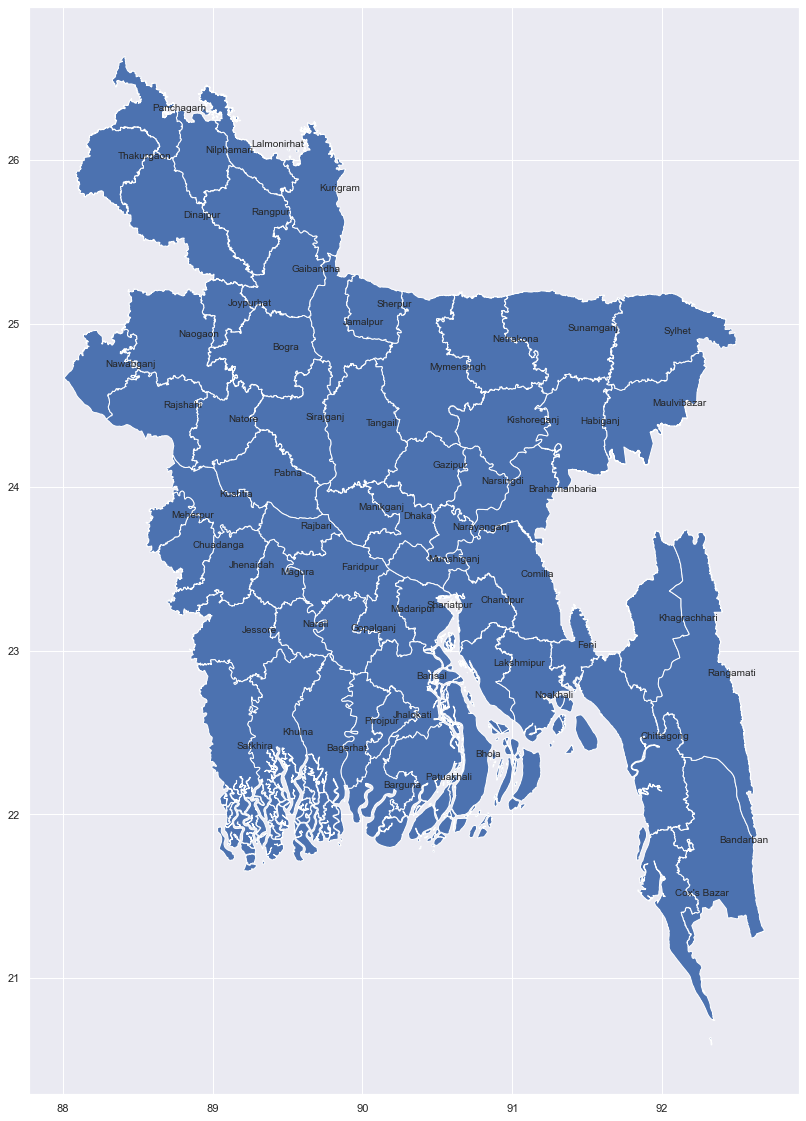

In [8]:
# make a chloropleth map showing the average rice price for each district in bangladesh

fig,ax = plt.subplots(figsize=(20,20))
ax = geo_df.plot(ax=ax)
for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",fontsize=10)
plt.show()


In [9]:
# show the average rice price and make it cloropleth 

# merge the two dataframes if the district of geo_df shapename is not found in df for that year, make the average price 0
geo_df = geo_df.merge(df, left_on='shapeName', right_on='district', how='left')
geo_df['average price'] = geo_df['average price'].fillna(0)
# fix the NAN of every column by putting an average value of that column
geo_df = geo_df.fillna(geo_df.mean())
geo_df

C:\Users\errhy\AppData\Local\Temp\ipykernel_2512\3644941051.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geo_df = geo_df.fillna(geo_df.mean())


,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry,coords,department,district,Upazila,Bazar,Merchandise,Price type,year,lowest price,Maximum price,average price
0,Bagerhat,NaN,16705992B20839200632344,BGD,ADM2,"MULTIPOLYGON (((89.84021 21.82784, 89.84052 21...","(89.75429176407334, 22.523421011000067)",Khulna,Bagerhat,Bagerhat Sadar,Bagerhat Sadar,Boro,Retail,2019.0,13.53,14.37,13.95
1,Bagerhat,NaN,16705992B20839200632344,BGD,ADM2,"MULTIPOLYGON (((89.84021 21.82784, 89.84052 21...","(89.75429176407334, 22.523421011000067)",Khulna,Bagerhat,Bagerhat Sadar,Bagerhat Sadar,Boro,Retail,2019.0,16.55,17.12,16.83
2,Bandarban,NaN,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186...","(92.38619729828679, 21.77005344750006)",Chittagong,Bandarban,Bandarban Sadar,Bandarban Sadar,Aman,Retail,2011.0,19.50,20.50,20.00
3,Bandarban,NaN,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186...","(92.38619729828679, 21.77005344750006)",Chittagong,Bandarban,Bandarban Sadar,Bandarban Sadar,Aman,Retail,2011.0,29.00,30.00,29.50
4,Bandarban,NaN,16705992B11302512284440,BGD,ADM2,"POLYGON ((92.61391 21.85191, 92.61389 21.85186...","(92.38619729828679, 21.77005344750006)",Chittagong,Bandarban,Bandarban Sadar,Bandarban Sadar,Aman,Retail,2013.0,43.49,44.86,44.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562,Tangail,NaN,16705992B95532052767873,BGD,ADM2,"POLYGON ((90.14755 24.03354, 90.14726 24.03351...","(90.00163283476385, 24.375756978000055)",Dhaka,Tangail,Tangail Sadar Bazar,Tangail Sadar Bazar,Boro,Retail,2020.0,23.63,24.63,24.13
563,Thakurgaon,NaN,16705992B71150444333759,BGD,ADM2,"POLYGON ((88.62676 26.05593, 88.62649 26.05594...","(88.31074812085605, 25.936234042000052)",Rangpur,Thakurgaon,Thakurgaon Sadar,Thakurgaon Sadar,Boro,Retail,2010.0,28.00,30.00,29.00
564,Thakurgaon,NaN,16705992B71150444333759,BGD,ADM2,"POLYGON ((88.62676 26.05593, 88.62649 26.05594...","(88.31074812085605, 25.936234042000052)",Rangpur,Thakurgaon,Thakurgaon Sadar,Thakurgaon Sadar,Aman,Retail,2011.0,14.00,16.00,15.00
565,Thakurgaon,NaN,16705992B71150444333759,BGD,ADM2,"POLYGON ((88.62676 26.05593, 88.62649 26.05594...","(88.31074812085605, 25.936234042000052)",Rangpur,Thakurgaon,Thakurgaon Sadar,Thakurgaon Sadar,Aman,Retail,2011.0,26.00,29.50,27.75


C:\Users\errhy\AppData\Local\Temp\ipykernel_2512\3593419354.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):


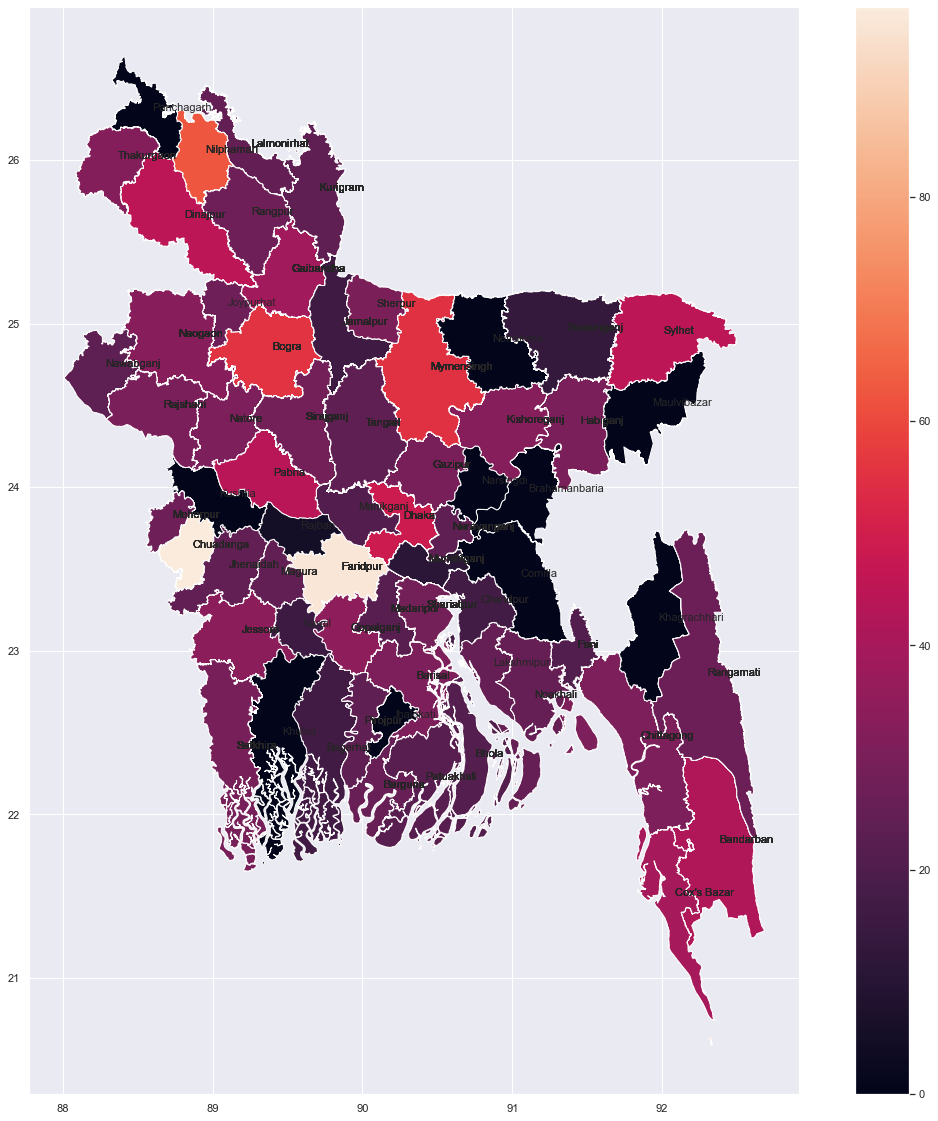

In [10]:
# plot the average rice price for each district in bangladesh

fig,ax = plt.subplots(figsize=(20,20))
ax = geo_df.plot(ax=ax, column='average price', legend=True)
for x, y, label in zip(geo_df.geometry.centroid.x, geo_df.geometry.centroid.y, geo_df['shapeName']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize=11)
plt.show()

In [61]:
# make the heatmap 3d with intensity as year and x and y axis as district and average price

import plotly.express as px
fig = px.density_heatmap(df, x="district", y="average price", z="year", histfunc="avg", color_continuous_scale="Viridis")
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [28]:
# import the geoBoundaries-BGD-ADM1.shp file to visualize the map of bangladesh with divisions

geo_df2 = gpd.read_file('map/geoBoundaries-BGD-ADM1.shp')
geo_df2.head()

,shapeName,shapeISO,shapeID,shapeGroup,shapeType,geometry
0,Barisal,NaN,88445334B70010311783191,BGD,ADM1,"MULTIPOLYGON (((90.47706 21.78115, 90.47726 21..."
1,Chittagong,NaN,88445334B16188150926659,BGD,ADM1,"MULTIPOLYGON (((90.61345 23.03596, 90.61402 23..."
2,Dhaka,NaN,88445334B88394660865728,BGD,ADM1,"MULTIPOLYGON (((90.45837 23.00404, 90.45814 23..."
3,Khulna,NaN,88445334B19511901628799,BGD,ADM1,"MULTIPOLYGON (((89.27775 21.69526, 89.28006 21..."
4,Mymensingh,NaN,88445334B47685976791029,BGD,ADM1,"POLYGON ((91.19521 24.63114, 91.19503 24.63121..."


In [ ]:
# plot the division names inside the map and also the average price of rice for each division